# 1d3v GEMPIC electron hybrid code for R/L-waves with stationary ions

## 1. The model
The electron hybrid model for cold fluid electrons and hot kinetic electrons reads

\begin{align}
\frac{\partial \textbf{j}_\text{c}}{\partial t} = \epsilon_0\Omega_{\text{pe}}^2\textbf{E} + \Omega_\text{ce}\textbf{j}_\text{c}\times\textbf{e}_z,  \\
\frac{1}{c^2}\frac{\partial \textbf{E}}{\partial t} = \nabla\times\textbf{B} - \mu_0(\textbf{j}_\text{c} + \textbf{j}_\text{h}), \\
\frac{\partial \textbf{B}}{\partial t}=-\nabla\times\textbf{E}, \\
\frac{\partial f_\text{h}}{\partial t} + \textbf{v}\cdot\nabla f_\text{h} + \frac{q}{m}(\textbf{E}+\textbf{v}\times\textbf{B})\cdot\nabla_v f_\text{h}=0, \\
\textbf{j}_\text{h} = q\int\text{d}^3\textbf{v}\,\textbf{v}f_\text{h}.
\end{align}

where $\Omega_\text{ce}=\frac{q B_0}{m}$ is the signed cyclotron frequency and $\Omega_{\text{pe}}^2=\frac{n_\text{c}e^2}{\epsilon_0 m}$ the plasma frequency of the cold electrons. Here, only wave propagation parallel to the background magnetic field $\textbf{B}_0=B_0\textbf{e}_z$ is considered, i.e. $\textbf{k}=k\textbf{e}_z$. Therefore the nabla operator is simply $\nabla=\textbf{e}_z\partial_z$.

The first three equations are written in the compact form 

\begin{align}
\partial_t \textbf{U}+A_1\partial_z \textbf{U}+A_2\textbf{U}=\textbf{F},\label{system_of_equations}
\end{align}

for the electromagnetic fields $\textbf{E},\textbf{B}$ and the cold current density $\textbf{j}$, i.e. $\textbf{U}=(E_x,E_y,B_x,B_y,j_{\text{c}x},j_{\text{c}y})$. The z-components do not appear because they correspond to electrostatic waves which are not considered in this work. The matrices are

\begin{align}
A_1=
\begin{pmatrix}
0 &0  &0 &c^2  &0 &0 \\
0 &0  &-c^2 &0 &0 &0 \\
0 &-1  &0 &0 &0 &0  \\
1 &0  &0 &0 &0 &0  \\
0 &0  &0 &0 &0 &0   \\
0 &0  &0 &0 &0 &0 
\end{pmatrix}
\end{align}

and 

\begin{align}
A_2=
\begin{pmatrix}
0 &0 &0 &0 &\mu_0c^2 &0 \\
0 &0 &0 &0 &0 &\mu_0c^2 \\
0 &0 &0 &0 &0 &0 \\
0 &0 &0 &0 &0 &0 \\
-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &0 &0 &-\Omega_{\text{ce}} \\
0 &-\epsilon_0\Omega_{\text{pe}}^2 &0 &0 &\Omega_{\text{ce}} &0 \\
\end{pmatrix}
\end{align}

with $\Omega_{\text{ce}}=-\frac{eB_0}{m}<0$ for electrons. The inhomogeneity is 

\begin{align}
\textbf{F}=
\begin{pmatrix}
-\mu_0c^2 j_{\text{h}x} \\
-\mu_0c^2 j_{\text{h}y} \\
0 \\
0 \\
0 \\
0
\end{pmatrix}.
\end{align}


## 2. Dispersion relation
Linear theory of the above model leads to the following general dispersion relation for an arbitrary equilibrium distribution function $f^0=f^0(v_\parallel,v_\bot)$:


\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega}\int\text{d}^3\textbf{v}\frac{v_\bot}{2}\frac{\hat{G}f_\text{h}^0}{\omega\pm\Omega_{\text{ce}}-kv_\parallel}=0.
\end{align}

Here $\nu_\text{h}=n_\text{h}/n_\text{c}\ll1$ is the ratio between the hot and cold electron number densities, respectively, $\text{d}^3\textbf{v}=\text{d}v_\parallel\text{d}v_\bot v_\bot 2\pi$ and the differential operator

\begin{align}
\hat{G}=\frac{\partial}{\partial v_\bot}+\frac{k}{\omega}\left(v_\bot\frac{\partial}{\partial v_\parallel}-v_\parallel\frac{\partial}{\partial v_\bot}\right).
\end{align}

For an anisotropic Maxwellian 

\begin{align}
f^0(v_\parallel,v_\bot) = \frac{1}{(2\pi)^{3/2}w_\parallel w_\bot^2}\exp\left(-\frac{v_\parallel^2}{2w_\parallel^2}-\frac{v_\bot^2}{2w_\bot^2}\right)
\end{align}

the dispersion relation is given by

\begin{align}
D_{\text{R/L}}(k,\omega)=D_{\text{cold,R/L}}(k,\omega)+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega^2}\left[\frac{\omega}{k\sqrt{2}w_\parallel}Z(\xi^{\pm})-\left(1-\frac{w_\bot^2}{w_\parallel^2}\right)(1+\xi^{\pm} Z(\xi^{\pm}))\right]=0, 
\end{align}

where $Z$ is the plasma dispersion function and 

\begin{align}
\xi^{\pm} = \frac{\omega\pm\Omega_\text{ce}}{k\sqrt{2}w_\parallel}.
\end{align}

## 3. Discretization
We assume the domain to be $\Omega = (a,b)$ and suppose periodic boundary conditions for all quantities. In order to obtain a weak formulation of (\ref{system_of_equations}) we multiply by test functions $F_x$, $F_y$, $C_x$, $C_y$, $O_x$ and $O_y$ and integrate over $\Omega$:

\begin{align}
    &\int_a^b\frac{\partial E_x}{\partial t}F_x\mathrm{d}z-c^2\int_a^bB_y\frac{\partial F_x}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_xF_x\mathrm{d}z=-\mu_0c^2\int_a^bj_{\mathrm{h}x}F_x\mathrm{d}z \\
    &\int_a^b\frac{\partial E_y}{\partial t}F_y\mathrm{d}z+c^2\int_a^bB_x\frac{\partial F_x}{\partial z}\mathrm{d}z+\mu_0c^2\int_a^bj_yF_y\mathrm{d}z=-\mu_0c^2\int_a^bj_{\mathrm{h}y}F_y\mathrm{d}z \\
    &\int_a^b\frac{\partial B_x}{\partial t}C_x\mathrm{d}z-\int_a^b\frac{\partial E_y}{\partial z}C_x\mathrm{d}z=0 \\
    &\int_a^b\frac{\partial B_y}{\partial t}C_y\mathrm{d}z+\int_a^b\frac{\partial E_x}{\partial z}C_y\mathrm{d}z=0 \\
    &\int_a^b\frac{\partial j_x}{\partial t}O_x\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_xO_x\mathrm{d}z-\Omega_\mathrm{ce}\int_a^bj_yO_x\mathrm{d}z=0 \\
    &\int_a^b\frac{\partial j_y}{\partial t}O_y\mathrm{d}z-\epsilon_0\Omega_\mathrm{pe}^2\int_a^bE_yO_y\mathrm{d}z+\Omega_\mathrm{ce}\int_a^bj_xO_y\mathrm{d}z=0
\end{align}

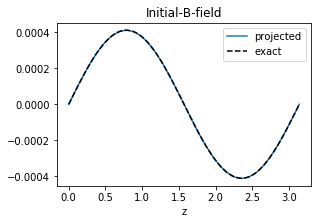

In [203]:
import numpy as np
import scipy as sc
import fembase as fem
import picbase as pic
import matplotlib.pyplot as plt
import time
from copy import deepcopy
from scipy.integrate import fixed_quad
import Utilitis_HybridCode as utils

# ... start the simulation from the beginning (0) or continue (1)
restart = 0
# ...

# ... directory for saving data
title = 'Results/01_NoDipoleField/simulation_data_T=200_L=2pi_2_test.txt' 
# ...


# ... save only every saving_step-th time step
saving_step = 5
# ...



# ... physical parameters
eps0 = 1.0                         # ... vacuum permittivity
mu0 = 1.0                          # ... vacuum permeability
c = 1.0                            # ... speed of light
qe = -1.0                          # ... electron charge
me = 1.0                           # ... electron mass
B0z = 1.0                          # ... background magnetic field in z-direction
wce = qe*B0z/me                    # ... electron cyclotron frequency
wpe = 2*np.abs(wce)                # ... cold electron plasma frequency
nuh = 6e-2                         # ... ratio of cold/hot electron densities (nh/nc)
nh = nuh*wpe**2*0                    # ... hot electron density
wpar = 0.2*c                       # ... parallel thermal velocity of energetic particles
wperp = 0.53*c                     # ... perpendicular thermal velocity of energetic particles
# ...



# ... parameters for initial conditions
k = 2                              # ... wavenumber of initial wave fields
ini = 3                            # ... initial conditions for wave fields
amp = 1e-4                         # ... amplitude of initial wave fields
eps = 0.0                          # ... amplitude of spatial pertubation of distribution function 
# ...



# ... numerical parameters
Lz = 2*np.pi/k                     # ... length of z-domain
Nel = 32                           # ... number of elements z-direction
T = 12                             # ... simulation time
dt = 0.1                           # ... time step
p = 2                              # ... degree of Lagrange interpolation basis (V0)
Lv = 8                             # ... length of v-domain in each direction (vx,vy,vz)
Nv = 76                            # ... number of cells in each v-direction (vx,vy,vz)
Np = np.int(5e4)                   # ... number of energetic simulation particles 
# ...





# ... discretization parameters
dz = Lz/Nel
el_b = np.linspace(0, Lz, Nel + 1)

dv = Lv/Nv
vj = np.linspace(-Lv/2, Lv/2, Nv+1)
# ...




# ... initial energetic particle distribution function (perturbed anisotropic Maxwellian)
def fh0(z, vx, vy, vz, eps):
    return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... Maxwellian for control variate
def Maxwell(vx, vy, vz):
    return nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... sampling distribution for initial markers
def g_sampling(vx, vy, vz):
    return 1/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))*1/Lz
# ...


# ... create Lagrange shape functions in V0 and V1 and compute global mass matrices M0 and M1
shapefun = fem.LagrangeShape(np.linspace(-1, 1, p + 1))
Nbase_0, mass_0 = fem.lag_assemb(el_b, shapefun.mass0, shapefun.stiff0, basis = 1, bcs = 1)[1:3]
Nbase_1, mass_1 = fem.lag_assemb(el_b, shapefun.mass1, shapefun.stiff1, basis = 2, bcs = 1)[1:3]

mass_0_inv = np.linalg.inv(mass_0)
# ...


# ... initialize Bx perturbation, project on LHPs and plot result
omega = utils.solveDispersionCold(k, +1, c, wce, wpe, 0.5, 1e-6)[0]



Ex0 = lambda z : +amp*np.cos(k*z)
Ey0 = lambda z : -amp*np.sin(k*z)
        
Bx0 = lambda z : -Ey0(z)*k/omega
By0 = lambda z : +Ex0(z)*k/omega
        
Dj = eps0*wpe**2*(omega - wce)/(wce**2 - omega**2)
        
jx0 = lambda z : -Ey0(z)*Dj
jy0 = lambda z : +Ex0(z)*Dj



#Bx0 = lambda x: amp*np.sin(k*x)

z_vec, bx = fem.lag_proj(shapefun.s, el_b, Bx0)
z_vec, by = fem.lag_proj(shapefun.s, el_b, By0)


ex = Ex0(z_vec[0:-1])
ey = Ey0(z_vec[0:-1])
yx = jx0(z_vec[0:-1])
yy = jy0(z_vec[0:-1])


z_plot = np.linspace(0, Lz, 200)

f1 = plt.figure()
f1.set_figheight(3)
f1.set_figwidth(10)


plt.subplot(122)
fun_Bx = fem.lag_fun(bx, shapefun.chi, el_b, basis = 2)[2]
fun_By = fem.lag_fun(by, shapefun.chi, el_b, basis = 2)[2]
fun_Ex = fem.lag_fun(ex, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
fun_Ey = fem.lag_fun(ey, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
fun_jx = fem.lag_fun(yx, shapefun.eta, el_b, basis = 1, bcs = 1)[2]
fun_jy = fem.lag_fun(yy, shapefun.eta, el_b, basis = 1, bcs = 1)[2]

plt.plot(z_plot, fun_Bx(z_plot), label = 'projected')
plt.plot(z_plot, Bx0(z_plot), 'k--', label = 'exact')
plt.xlabel('z')
plt.title('Initial-B-field')
plt.legend()
# ...


# ... assemble gradient matrix_G
grad1 = np.ones(Nbase_1 - 1)
grad2 = -np.ones(Nbase_1)
G = np.diag(grad2) + np.diag(grad1, +1)
G[-1, -1] = -1
G[-1, 0] = 1
# ...



# ... create particles (z,vx,vy,vz,wk) and sample positions and velocities according to sampling distribution
particles = np.zeros((Np, 5))
particles[:, 0] = np.random.rand(Np)*Lz
particles[:, 1] = np.random.randn(Np)*wperp
particles[:, 2] = np.random.randn(Np)*wperp
particles[:, 3] = np.random.randn(Np)*wpar
# ...




# ... parameters for control variate and compute initial weights
g0 = g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
w0 = fh0(particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], eps)/g_sampling(particles[:, 1], particles[:, 2], particles[:, 3])
#particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)

particles[:, 4] = 1/Np*w0
# ...


# ... assemble matrices Q0, Q1 and B1
W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

bx_temp = Q1.transpose().dot(bx)
by_temp = Q1.transpose().dot(by)

Bx = sc.sparse.csr_matrix((bx_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
By = sc.sparse.csr_matrix((by_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
# ...

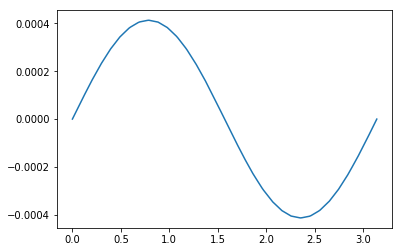

In [204]:
plt.plot(z_plot, fun_Bx(z_plot), label = 'projected')

In [178]:
# ... define time integrators for Hamiltonian Splitting
def integrator_HE(ex, ey, bx, by, yx, yy, vx, vy, Q0, dt):
    
    bx_new = bx + dt*np.dot(G, ey)
    by_new = by - dt*np.dot(G, ex)
    
    yx_new = yx + dt*eps0*wpe**2*ex
    yy_new = yy + dt*eps0*wpe**2*ey
    
    vx_new = vx + dt*qe/(eps0*me)*Q0.transpose().dot(ex)
    vy_new = vy + dt*qe/(eps0*me)*Q0.transpose().dot(ey)
    
    return bx_new, by_new, yx_new, yy_new, vx_new, vy_new


def integrator_HB(ex, ey, bx, by, dt):
    
    ex_new = ex + dt*c**2*np.dot(mass_0_inv, np.dot(np.transpose(G), np.dot(mass_1, by)))
    ey_new = ey - dt*c**2*np.dot(mass_0_inv, np.dot(np.transpose(G), np.dot(mass_1, bx)))
    
    return ex_new, ey_new


def integrator_HY(ex, ey, yx, yy, dt):
    
    ex_new = ex - 1/(eps0*wce)*(yx*np.sin(wce*dt) - yy*np.cos(wce*dt) + yy)
    ey_new = ey - 1/(eps0*wce)*(yy*np.sin(wce*dt) + yx*np.cos(wce*dt) - yx)
    
    yx_new = yx*np.cos(wce*dt) + yy*np.sin(wce*dt)
    yy_new = yy*np.cos(wce*dt) - yx*np.sin(wce*dt)
    
    return ex_new, ey_new, yx_new, yy_new


def integrator_Hx(ex, vx, vz, Q0, W, By, dt):
    
    ex_new = ex - dt*qe/eps0*np.dot(mass_0_inv, Q0.dot(W.dot(vx)))
    
    vz_new = vz + dt*qe/me*By.dot(vx)
    
    return ex_new, vz_new


def integrator_Hy(ey, vy, vz, Q0, W, Bx, dt):
    
    ey_new = ey - dt*qe/eps0*np.dot(mass_0_inv, Q0.dot(W.dot(vy)))
    
    vz_new = vz - dt*qe/me*Bx.dot(vy)
    
    return ey_new, vz_new



def integrator_Hz(bx, by, z, vx, vy, vz, dt):
    
    Np = len(z)
    
    z_new = (z + dt*vz)%Lz
    
    
    
    row_IQ = np.array([])
    col_IQ = np.array([])
    dat_IQ = np.array([])
    
    
    t_vec = np.zeros((Nel, Np))
    t_all = Lz/np.abs(vz)
    
    for iy in range(Nel):
        t_vec[iy] = ((el_b[iy] - z)/vz)%t_all
        
    
    
    ind_t_min = np.argmin(t_vec, axis = 0)
    signs = np.sign(vz).astype(int)
    steps = np.heaviside(vz, 1).astype(int)
    part_num  = np.arange(Np)
    parts = np.full(Np, True, dtype = bool)
    
    
    t_lower = np.zeros(Np)
    
    pos_lower = z
    iy = 0
    
    
    while np.any(parts) == True:
            
        ind_now = ind_t_min + signs*iy
        t_now = t_vec[ind_now%Nel, part_num]
        element = (ind_now - steps)%Nel
        
        bol = t_now > dt
        
        pos_upper = el_b[element + steps]
        pos_upper[bol] = z_new[bol]


        for il in range(p):
            int_vals = np.zeros(sum(parts))
            
            for m in range(il + 1, p + 1):
                int_vals += 1/vz[parts]*(el_b[element[parts] + 1] - el_b[element[parts]])/2*(shapefun.eta[m](2*(pos_upper[parts] - el_b[element[parts]])/(el_b[element[parts] + 1] - el_b[element[parts]]) - 1) - shapefun.eta[m](2*(pos_lower[parts] - el_b[element[parts]])/(el_b[element[parts] + 1] - el_b[element[parts]]) - 1)) 

            
            row_IQ = np.append(row_IQ, element[parts]*p + il)
            col_IQ = np.append(col_IQ, part_num[parts])
            dat_IQ = np.append(dat_IQ, int_vals)

        pos_lower = el_b[element + steps]
        
        pos_lower[np.logical_and(pos_lower == el_b[0], signs == -1)] = el_b[-1]
        pos_lower[np.logical_and(pos_lower == el_b[-1], signs == 1)] = el_b[0]
        
        
        parts[bol] = False
        iy += 1
        
        
    
    
    
    
    IQ = sc.sparse.csr_matrix((dat_IQ, (row_IQ, col_IQ)), shape = (Nel*p, Np)) 
    
    Bx_vec = IQ.transpose().dot(bx)
    By_vec = IQ.transpose().dot(by)
    
    IBx = sc.sparse.csr_matrix((Bx_vec, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    IBy = sc.sparse.csr_matrix((By_vec, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    vx_new = vx - qe/me*IBy.dot(vz)
    vy_new = vy + qe/me*IBx.dot(vz)
    
    return z_new, vx_new, vy_new

In [206]:
def integrator_easy(ex, ey, bx, by, yx, yy, dt):
    
    ex_new = ex + dt*c**2*np.dot(mass_0_inv, np.dot(np.transpose(G), np.dot(mass_1, by))) - yx
    ey_new = ey - dt*c**2*np.dot(mass_0_inv, np.dot(np.transpose(G), np.dot(mass_1, bx))) - yy
    
    bx_new = bx + dt*np.dot(G, ey)
    by_new = by - dt*np.dot(G, ex)
    
    yx_new = yx + dt*eps0*wpe**2*ex + wce*yy
    yy_new = yy + dt*eps0*wpe**2*ey - wce*yx
    
    return ex_new, ey_new, bx_new, by_new, yx_new, yy_new

In [148]:
# unit test for integrator_Hz

'''
Np = 2
zp = np.array([el_b[2] + 0.05])
vz = np.array([-1])
dt = 3*dz

print('z_start = ', zp)
print('z_end = ', (zp + dt*vz)%Lz)
print('vz = ', vz)
print('el_b = ', el_b)


z_end, IQ = integrator_Hz(bx, by, zp, particles[:, 1], particles[:, 2], vz, dt)

print(IQ.toarray())
'''

"\nNp = 2\nzp = np.array([el_b[2] + 0.05])\nvz = np.array([-1])\ndt = 3*dz\n\nprint('z_start = ', zp)\nprint('z_end = ', (zp + dt*vz)%Lz)\nprint('vz = ', vz)\nprint('el_b = ', el_b)\n\n\nz_end, IQ = integrator_Hz(bx, by, zp, particles[:, 1], particles[:, 2], vz, dt)\n\nprint(IQ.toarray())\n"

In [207]:
# time integration
Nt = np.int(T/dt)
en_B = np.array([])

counter = 0


ex_n = deepcopy(ex)
ey_n = deepcopy(ey)
bx_n = deepcopy(bx)
by_n = deepcopy(by)
yx_n = deepcopy(yx)
yy_n = deepcopy(yy)

while counter < Nt:
    
    ex_old = deepcopy(ex)
    ey_old = deepcopy(ey)
    bx_old = deepcopy(bx)
    by_old = deepcopy(by)
    yx_old = deepcopy(yx)
    yy_old = deepcopy(yy)
    
    # Lie-Trotter-splitting
    
    # HE-integrator
    #bx, by, yx, yy, particles[:, 1], particles[:, 2] = integrator_HE(ex, ey, bx, by, yx, yy, particles[:, 1], particles[:, 2], Q0, dt)
    #print('HE-integrator finished')
    
    #particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
    #W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    # HB-integrator
    #ex, ey = integrator_HB(ex, ey, bx, by, dt)
    #print('HB-integrator finished')
    
    # HY-integrator
    #ex, ey, yx, yy = integrator_HY(ex, ey, yx, yy, dt)
    #print('HY-integrator finished')
    
    ex, ey, bx, by, yx, yy = integrator_easy(ex, ey, bx, by, yx, yy, dt)
    
    # Hx-integrator
    #ex, particles[:, 3] = integrator_Hx(ex, particles[:, 1], particles[:, 3], Q0, W, By, dt)
    #print('Hx-integrator finished')
    
    #particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
    #W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    # Hy-integrator
    #ey, particles[:, 3] = integrator_Hy(ey, particles[:, 2], particles[:, 3], Q0, W, Bx, dt)
    #print('Hy-integrator finished')
    
    #particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
    #W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    # Hz-integrator
    #particles[:, 0], particles[:, 1], particles[:, 2] = integrator_Hz(bx, by, particles[:, 0], particles[:, 1], particles[:, 2], particles[:, 3], dt)
    #print('Hz-integrator finished')
    
    #particles[:, 4] = 1/Np*(w0 - Maxwell(particles[:, 1], particles[:, 2], particles[:, 3])/g0)
    #W = sc.sparse.csr_matrix((particles[:, 4], (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    
    
    # ... assemble matrices Q0, Q1 and B1
    #Q0 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 0)
    #Q1 = pic.assemb_Q(particles[:, 0], shapefun, el_b, bcs = 1, basis = 1)

    #bx_temp = Q1.transpose().dot(bx)
    #by_temp = Q1.transpose().dot(by)

    #Bx = sc.sparse.csr_matrix((bx_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    #By = sc.sparse.csr_matrix((by_temp, (np.arange(Np), np.arange(Np))), shape = (Np, Np))
    # ...
    
    en_B = np.append(en_B, np.dot(bx, np.dot(mass_1, bx)) + np.dot(by, np.dot(mass_1, by)))
    
    ex_n = np.vstack((ex_n, ex))
    ey_n = np.vstack((ey_n, ey))
    bx_n = np.vstack((bx_n, bx))
    by_n = np.vstack((by_n, by))
    yx_n = np.vstack((yx_n, yx))
    yy_n = np.vstack((yy_n, yy))
    
    counter += 1
    print('steps finished : ' + str(counter))

steps finished : 1
steps finished : 2
steps finished : 3
steps finished : 4
steps finished : 5
steps finished : 6
steps finished : 7
steps finished : 8
steps finished : 9
steps finished : 10
steps finished : 11
steps finished : 12
steps finished : 13
steps finished : 14
steps finished : 15
steps finished : 16
steps finished : 17
steps finished : 18
steps finished : 19
steps finished : 20
steps finished : 21
steps finished : 22
steps finished : 23
steps finished : 24
steps finished : 25
steps finished : 26
steps finished : 27
steps finished : 28
steps finished : 29
steps finished : 30
steps finished : 31
steps finished : 32
steps finished : 33
steps finished : 34
steps finished : 35
steps finished : 36
steps finished : 37
steps finished : 38
steps finished : 39
steps finished : 40
steps finished : 41
steps finished : 42
steps finished : 43
steps finished : 44
steps finished : 45
steps finished : 46
steps finished : 47
steps finished : 48
steps finished : 49
steps finished : 50
steps fin

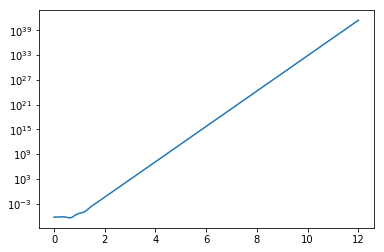

In [208]:
tn = np.linspace(0, counter*dt, counter)
plt.semilogy(tn, en_B)
#plt.semilogy(tn, 1e-8*np.exp(2*gamma*tn))

In [13]:
omega = utils.solveDispersionHybrid(k, +1, c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-6)[0]

In [189]:
np.dot(mass_0_inv, np.dot(np.transpose(G), mass_1))

array([[-2.94974747,  1.19238816, -0.50609665, ...,  0.50609665,
        -1.19238816,  2.94974747],
       [ 1.76776695, -1.76776695,  0.43198052, ..., -0.07411614,
         0.1746212 , -0.43198052],
       [-1.19238816,  2.94974747, -2.94974747, ...,  0.08683246,
        -0.20458146,  0.50609665],
       ...,
       [ 0.07411614, -0.02996026,  0.01271632, ..., -1.76776695,
         0.43198052, -0.1746212 ],
       [-0.50609665,  0.20458146, -0.08683246, ...,  2.94974747,
        -2.94974747,  1.19238816],
       [ 0.43198052, -0.1746212 ,  0.07411614, ..., -0.43198052,
         1.76776695, -1.76776695]])

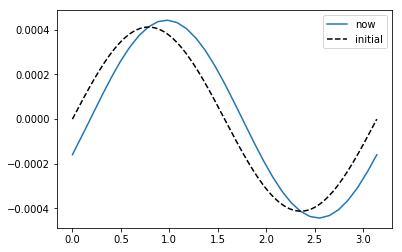

In [167]:
fun_Bx = fem.lag_fun(bx, shapefun.chi, el_b, basis = 2, bcs = 1)[2]
plt.plot(z_plot, fun_Bx(z_plot), label = 'now')
plt.plot(z_plot, Bx0(z_plot), 'k--', label = 'initial')
plt.legend()

Start to prepare animation!
Number of frames: 60
Frames finished: 0
Frames finished: 50



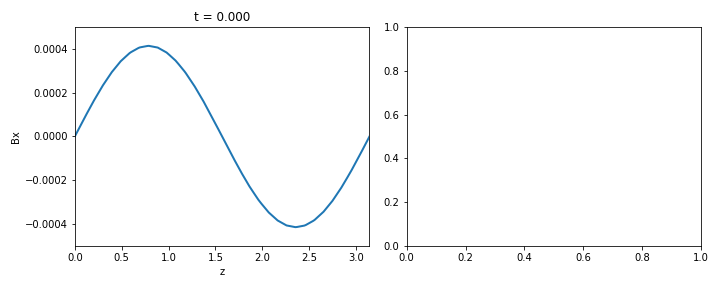
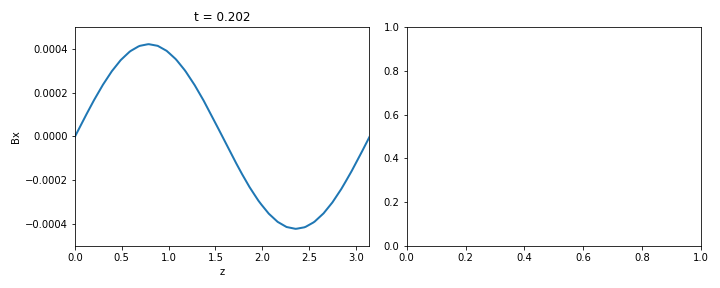
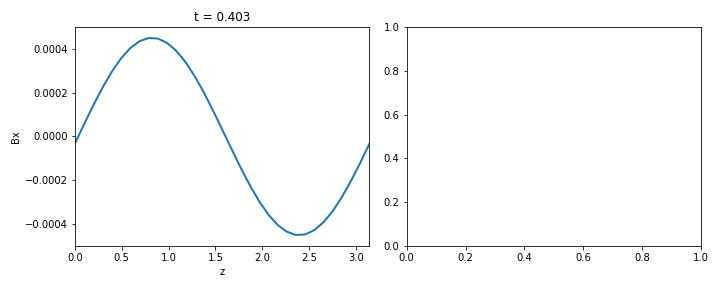
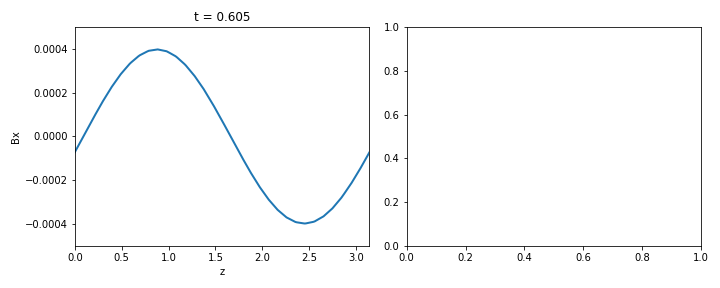
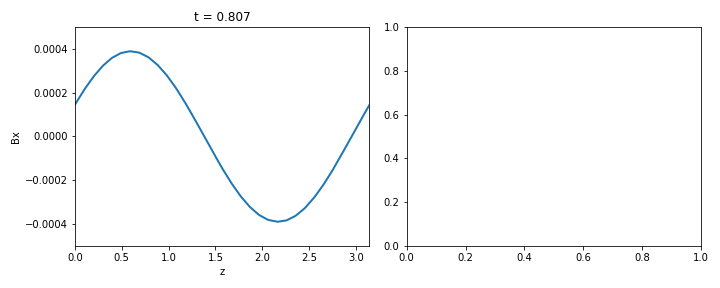
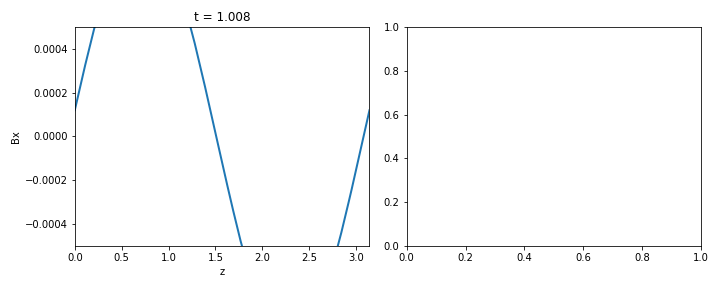
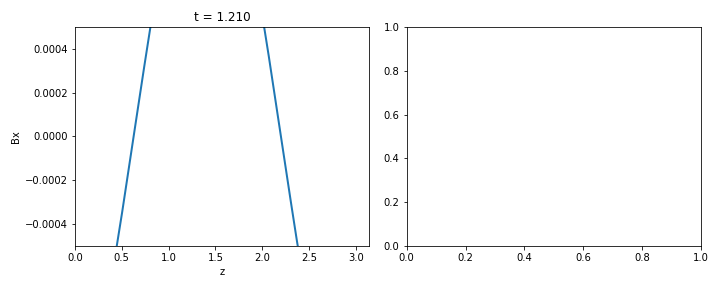
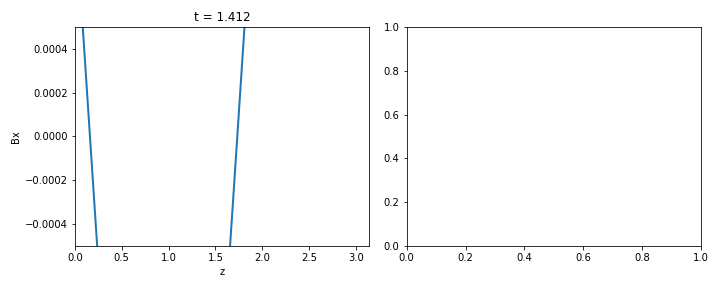
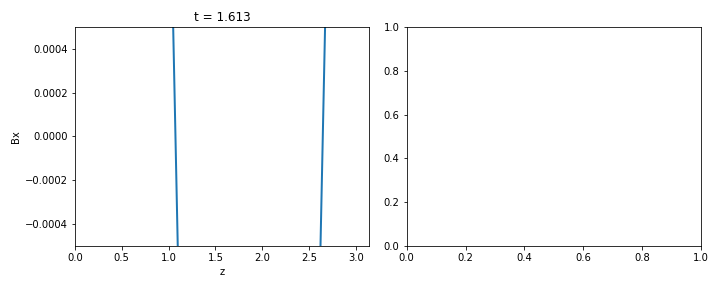
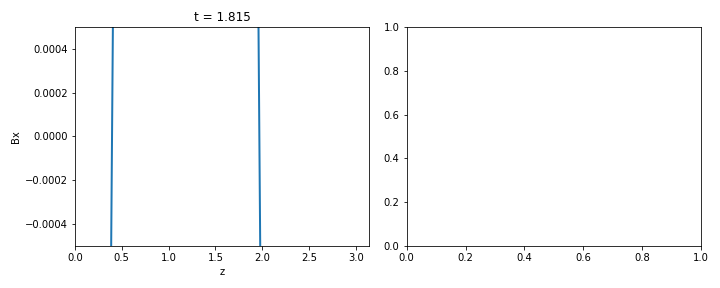
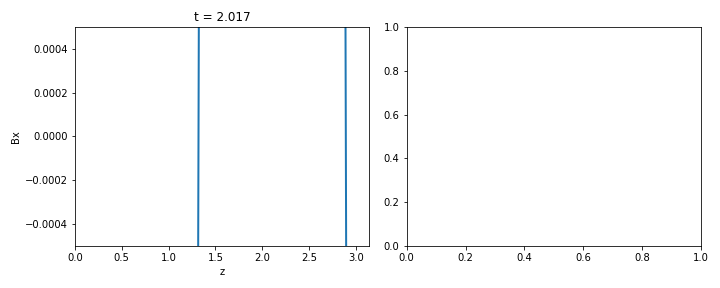
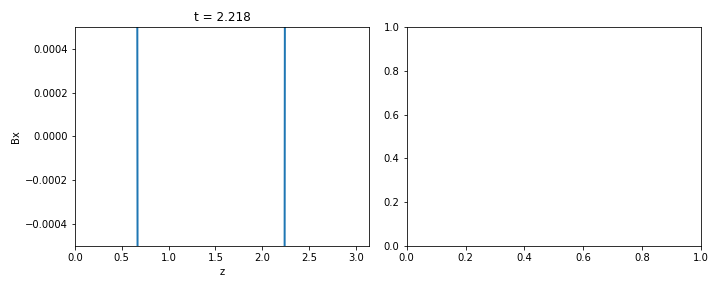
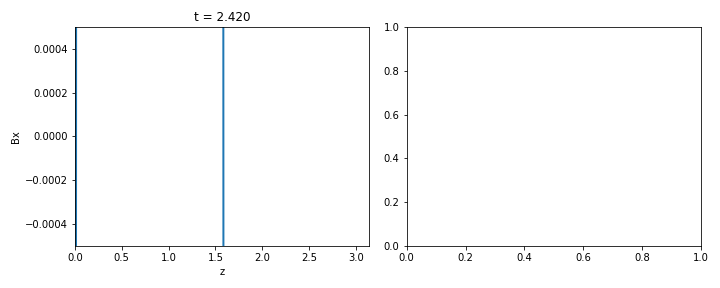
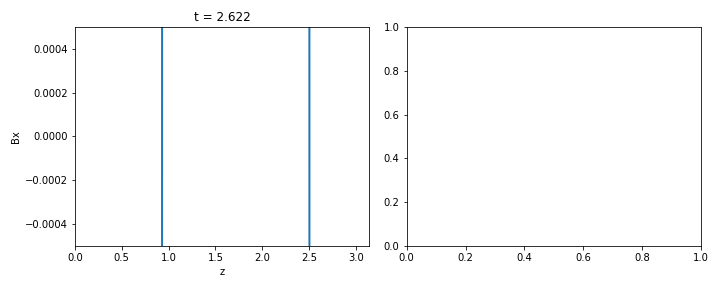
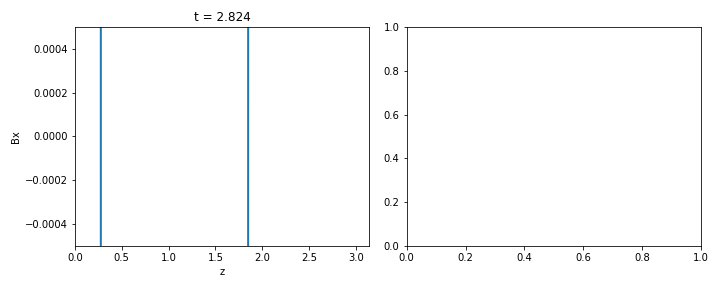
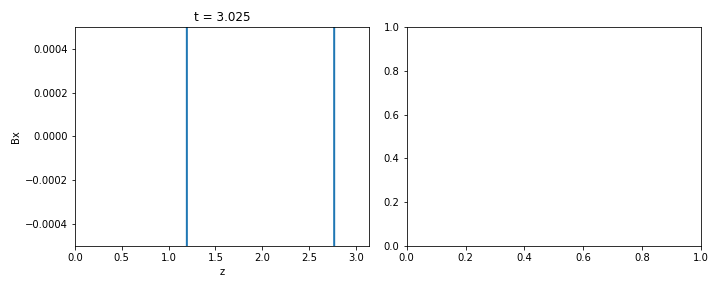
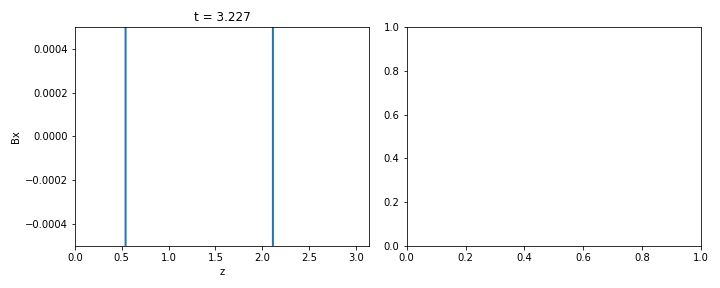
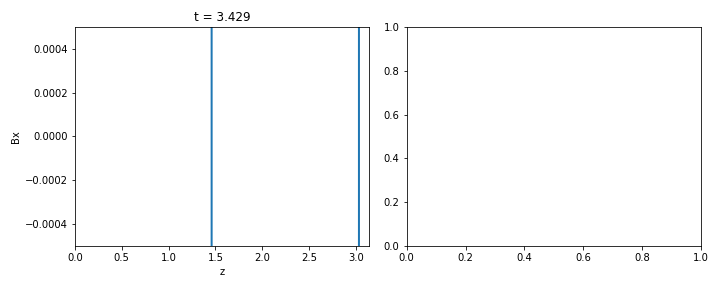
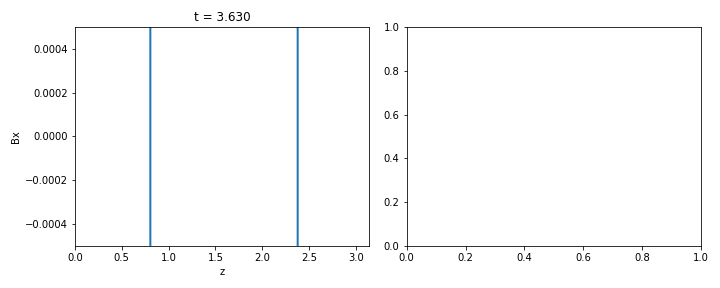
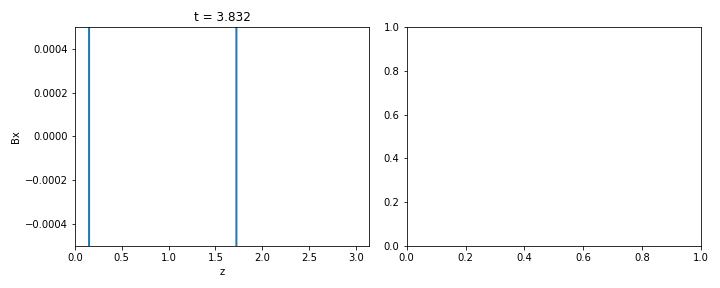
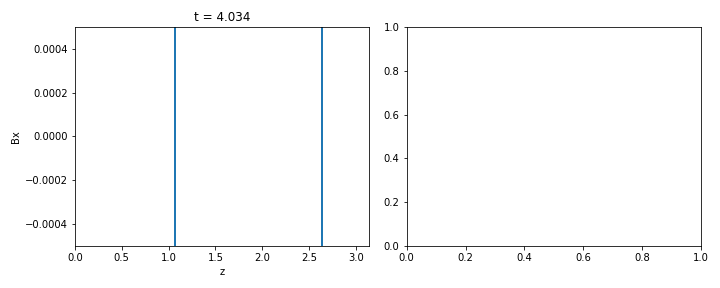
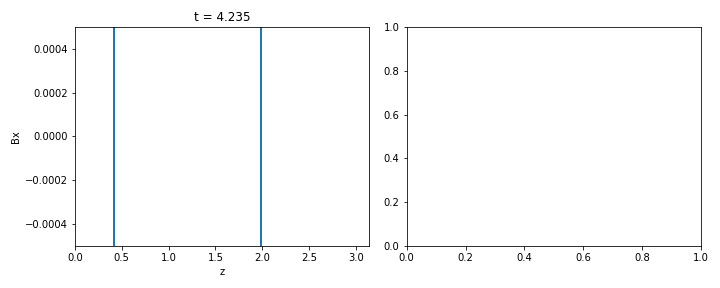
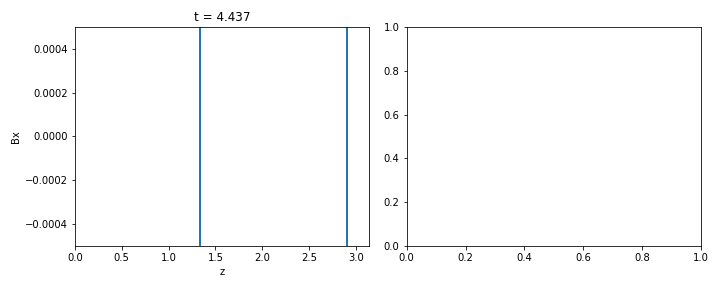
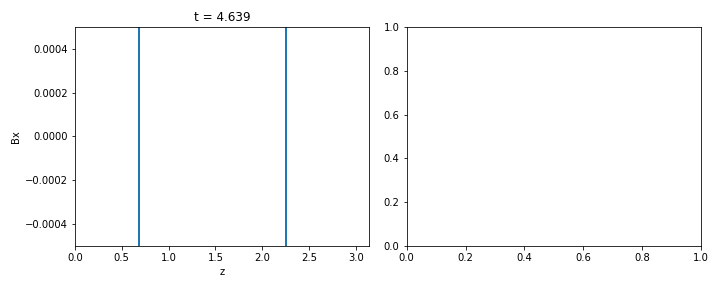
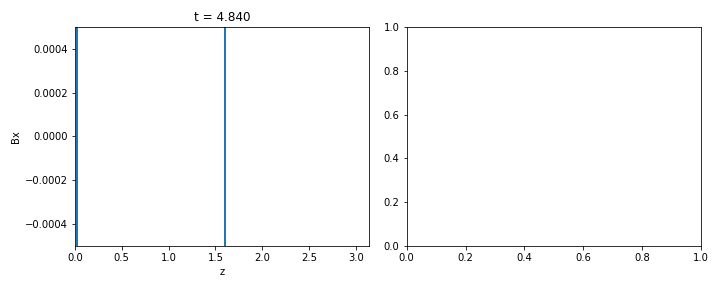
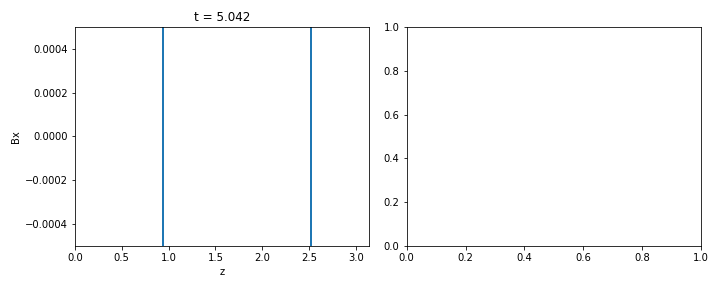
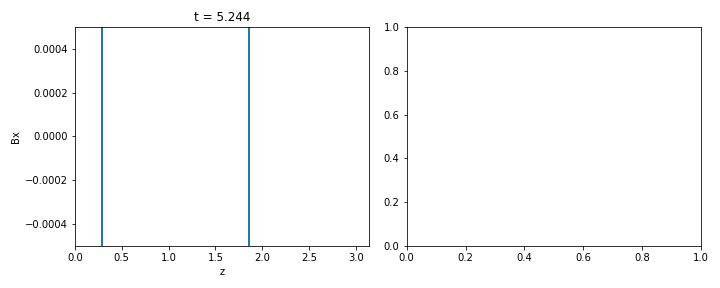
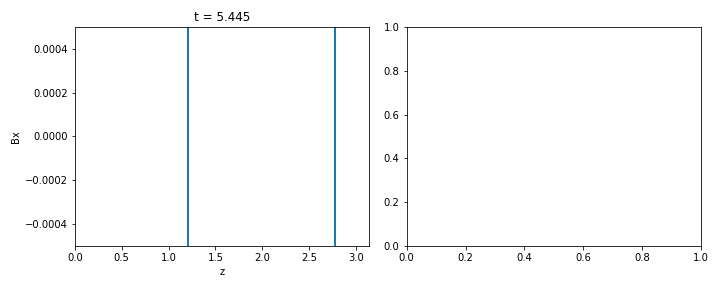
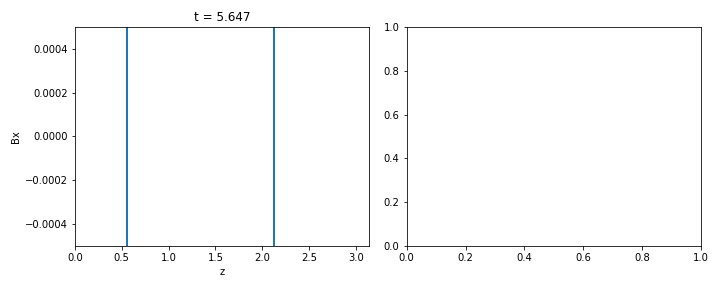
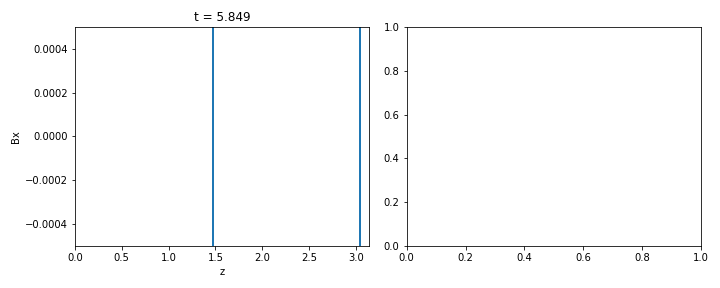
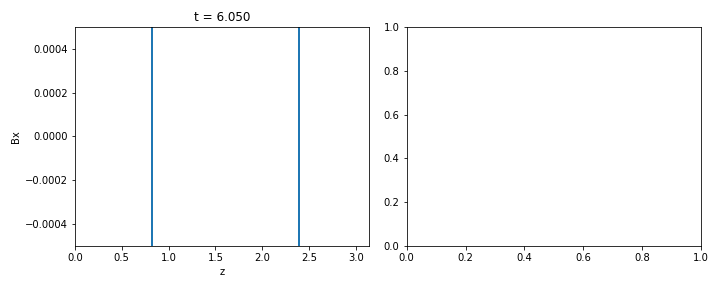
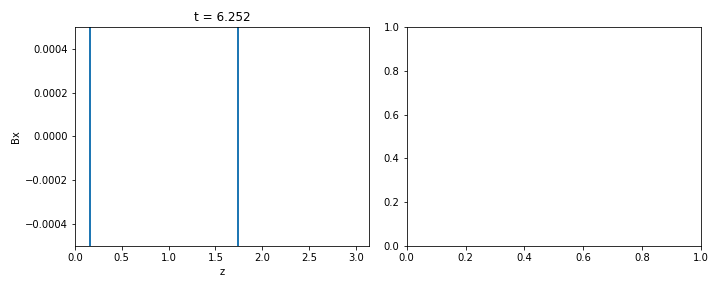
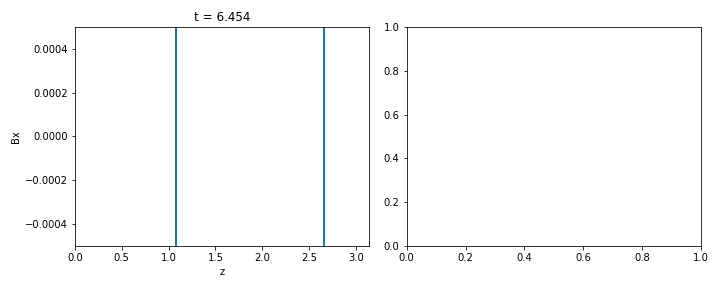
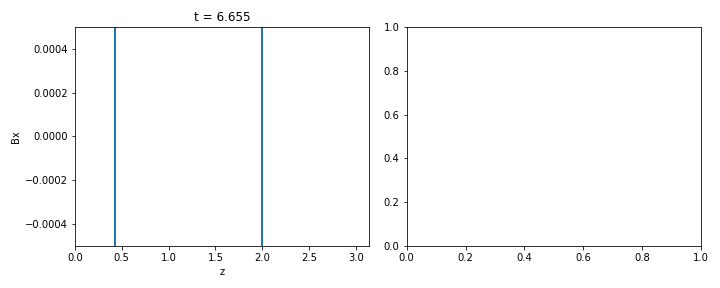
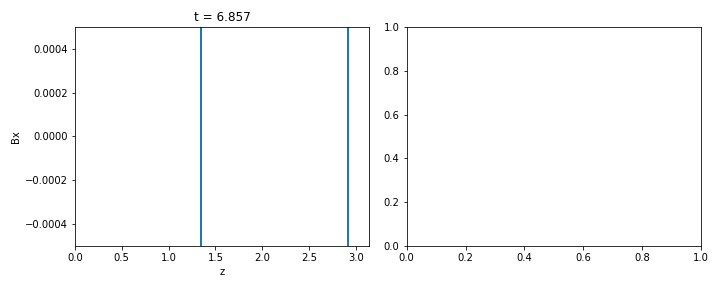
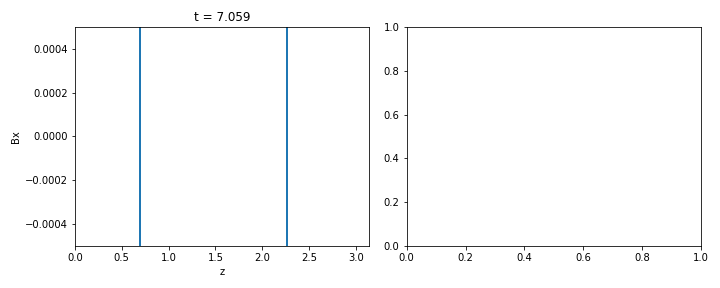
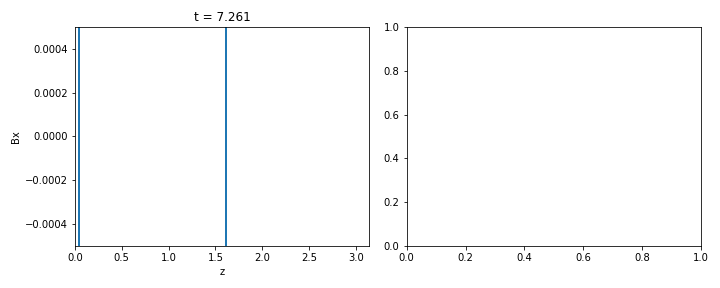
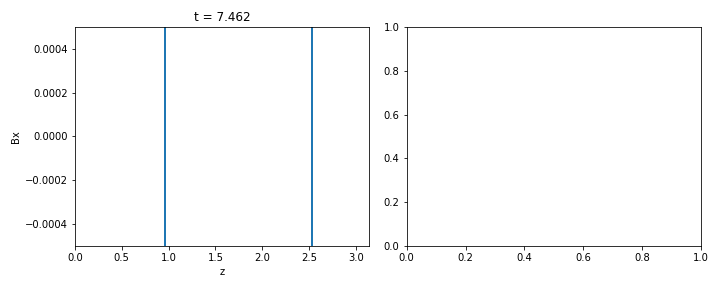
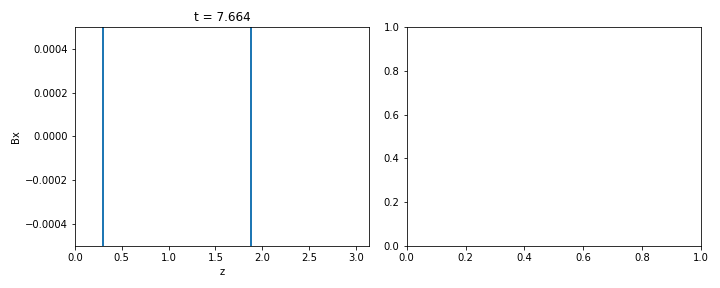
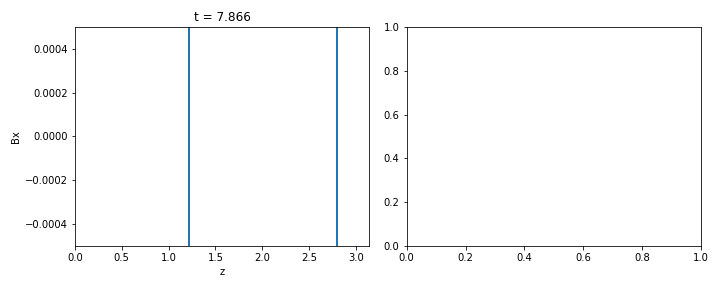
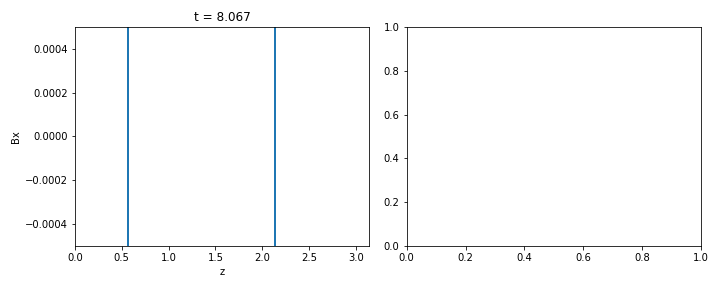
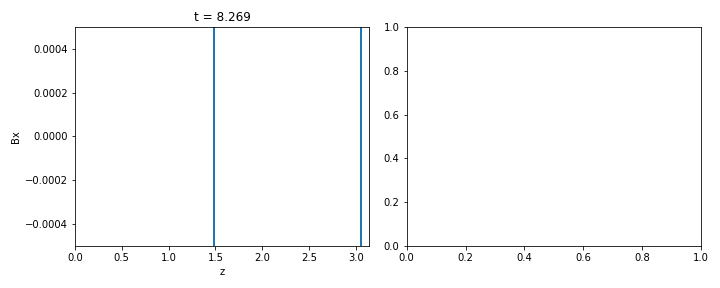
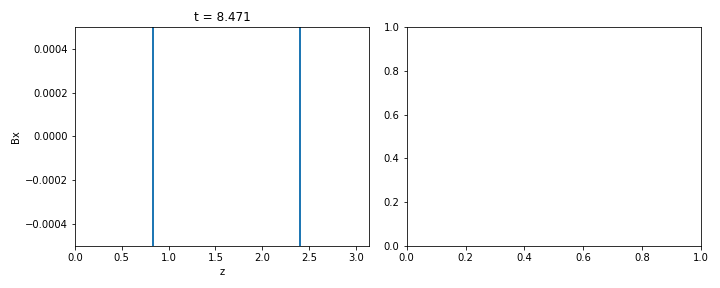
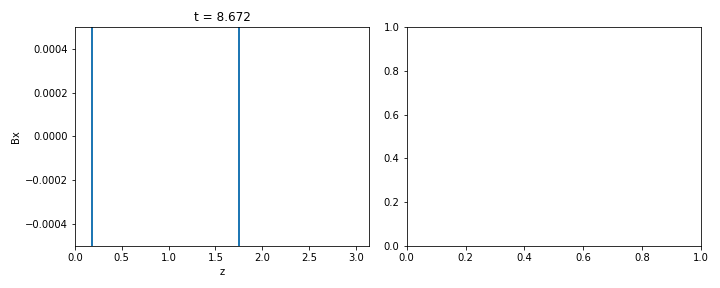
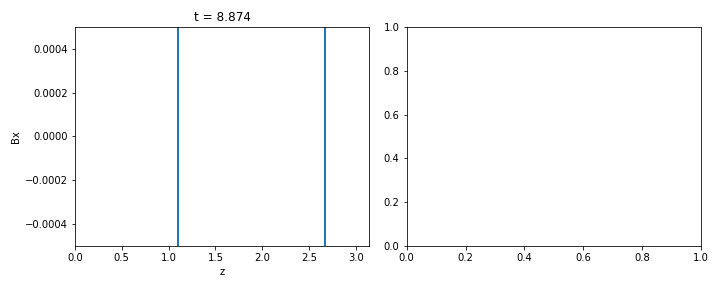
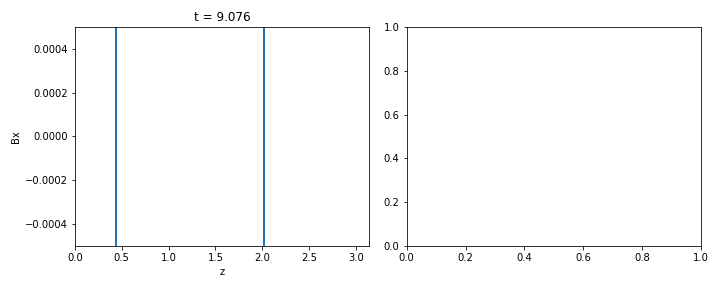
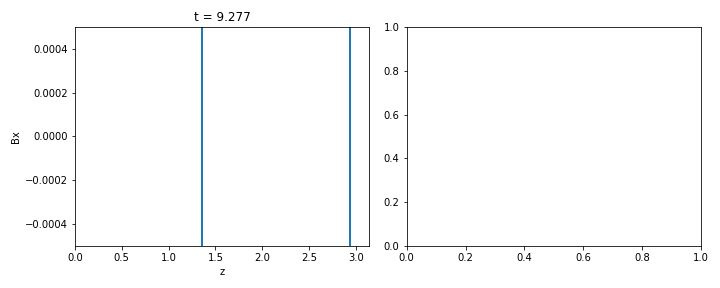
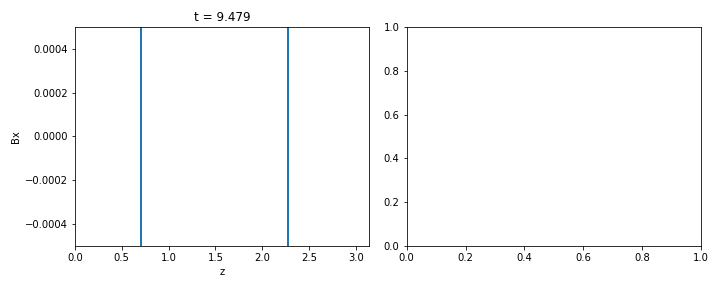
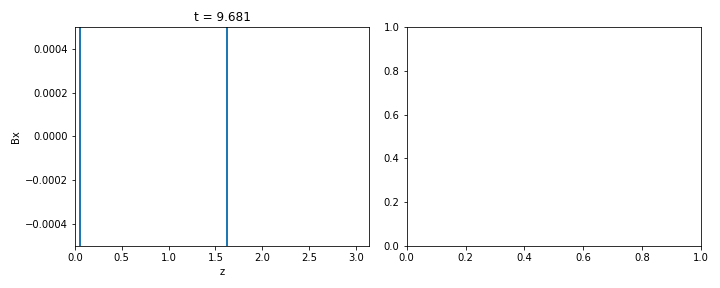
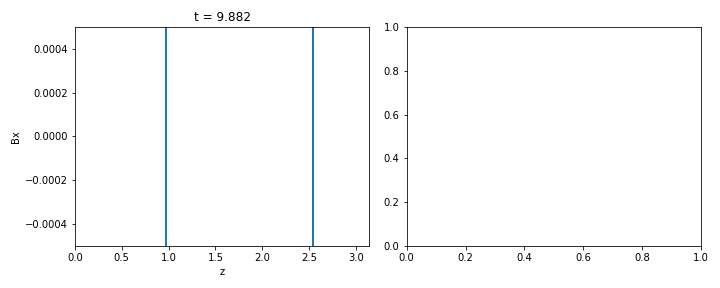
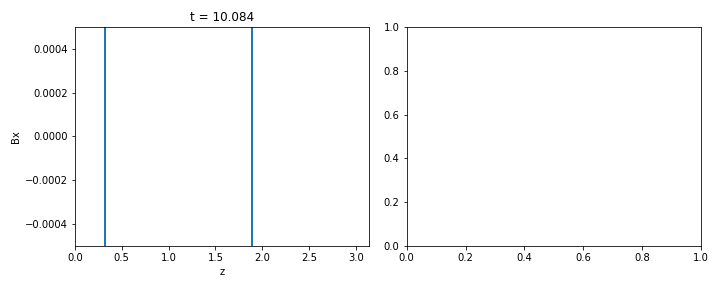
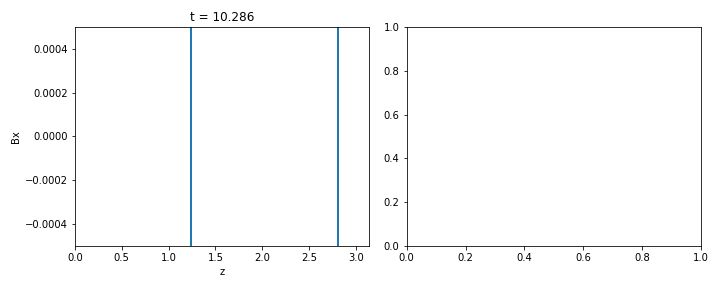
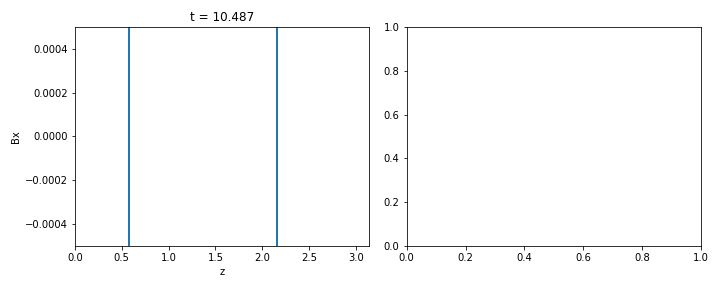
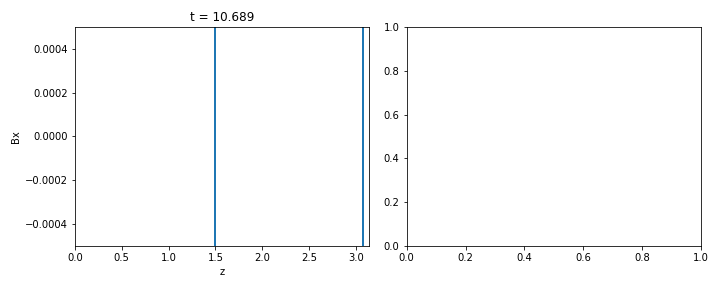
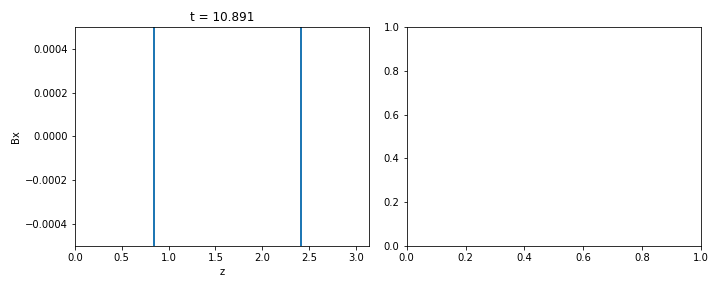
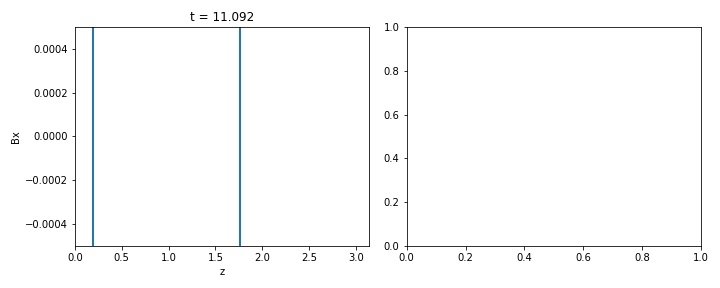
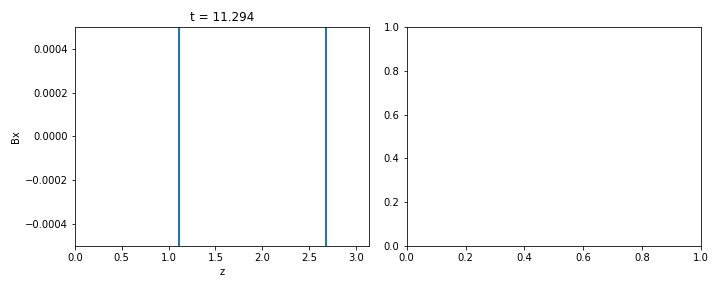
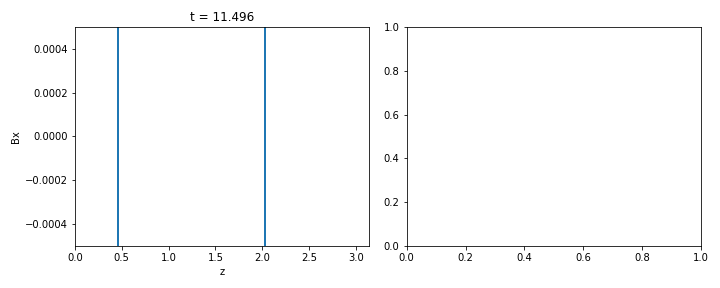
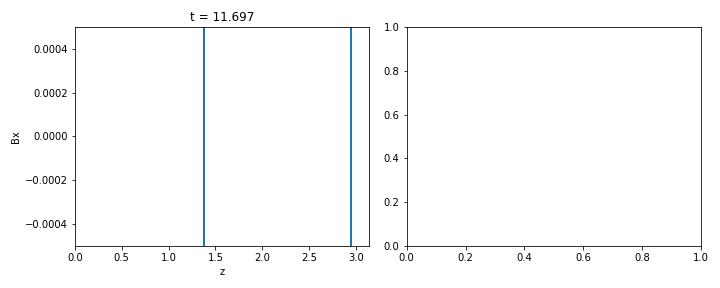
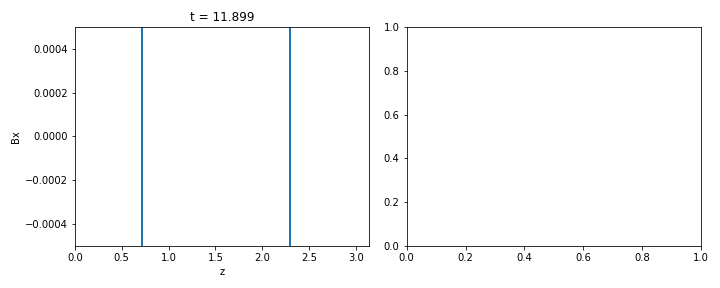

In [209]:
from JSAnimation import IPython_display
from matplotlib import animation

fr = 2
    
print('Start to prepare animation!')
print('Number of frames: ' + str(int(counter/fr)))

f2, (a1, a2) = plt.subplots(1,2,sharex = 'col')
f2.set_figheight(4)
f2.set_figwidth(10)

a1.set_title('t = 0.000')

a1.set_xlim((0,Lz))
a1.set_ylim((-5*amp,5*amp))




a1.set_ylabel('Bx')





line1, = a1.plot([],[], lw = 2)



a1.set_xlabel('z')


plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
plt.tight_layout()

def init():  

    line1.set_data([], [])

    return line1,




def animate(i):
    
    ti = int(fr*i)

    if i%50 == 0:
        print('Frames finished: ' + str(i))

    fun_Bx_ani = fem.lag_fun(bx_n[ti], shapefun.chi, el_b, basis = 2, bcs = 1)[2]      
    line1.set_data(z_plot, fun_Bx_ani(z_plot))
    
    a1.set_title('t = '+'%.3f' % tn[ti])
   

    return line1,

animation.FuncAnimation(f2, animate, init_func = init, frames = int(counter/fr), interval = 50, blit = True)

In [175]:
bx_n

array([[-1.42163307e-04, -1.00321732e-04, -5.75050795e-05,
        -1.41433818e-05,  2.93630357e-05,  7.25784905e-05,
         1.15102746e-04,  1.56511212e-04,  1.96419122e-04,
         2.34429296e-04,  2.70187222e-04,  3.03338393e-04,
         3.33572178e-04,  3.60590366e-04,  3.84138143e-04,
         4.03985053e-04,  4.19941894e-04,  4.31854821e-04,
         4.39607513e-04,  4.43128651e-04,  4.42379263e-04,
         4.37373295e-04,  4.28150625e-04,  4.14809929e-04,
         3.97468399e-04,  3.76305650e-04,  3.51511685e-04,
         3.23340155e-04,  2.92046575e-04,  2.57948880e-04,
         2.21358278e-04,  1.82644774e-04,  1.42163307e-04,
         1.00321732e-04,  5.75050795e-05,  1.41433818e-05,
        -2.93630357e-05, -7.25784905e-05, -1.15102746e-04,
        -1.56511212e-04, -1.96419122e-04, -2.34429296e-04,
        -2.70187222e-04, -3.03338393e-04, -3.33572178e-04,
        -3.60590366e-04, -3.84138143e-04, -4.03985053e-04,
        -4.19941894e-04, -4.31854821e-04, -4.39607513e-0

In [147]:
np.dot(mass_0_inv, np.dot(np.transpose(G), np.dot(mass_1, by)))

array([-1.16530149e-06,  3.02391876e-06,  7.20161612e-06,  1.12904463e-05,
        1.52917797e-05,  1.91230884e-05,  2.27942887e-05,  2.62208409e-05,
        2.94208260e-05,  3.23109412e-05,  3.49167374e-05,  3.71593501e-05,
        3.90708183e-05,  4.05797461e-05,  4.17234294e-05,  4.24406851e-05,
        4.27726326e-05,  4.26706525e-05,  4.21781075e-05,  4.12608106e-05,
        3.99627014e-05,  3.82653388e-05,  3.62115511e-05,  3.37993516e-05,
        3.10688112e-05,  2.80344743e-05,  2.47321142e-05,  2.11922478e-05,
        1.74449761e-05,  1.35356151e-05,  9.48743722e-06,  5.35881632e-06,
        1.16530149e-06, -3.02391876e-06, -7.20161612e-06, -1.12904463e-05,
       -1.52917797e-05, -1.91230884e-05, -2.27942887e-05, -2.62208409e-05,
       -2.94208260e-05, -3.23109412e-05, -3.49167374e-05, -3.71593501e-05,
       -3.90708183e-05, -4.05797461e-05, -4.17234294e-05, -4.24406851e-05,
       -4.27726326e-05, -4.26706525e-05, -4.21781075e-05, -4.12608106e-05,
       -3.99627014e-05, -

In [150]:
test0 = np.array([1,1,1])

In [152]:
test1 = np.vstack((test0, np.array([2,2,2])))

In [153]:
test1

array([[1, 1, 1],
       [2, 2, 2]])